In [62]:
from typing import TypedDict
from pydantic import BaseModel
import pickle
import os

from baml_client.types import ReceiptInfo, ReceiptItem
class UnionReceiptInfo(BaseModel):
    value: ReceiptInfo | ReceiptItem


cache_dir = "../cache"

dirs = [
    "baml_results.pkl",
    "openai_structured_results.pkl",
    "openai_structured_union_results.pkl",
    "json_object_results.pkl",
    "raw_curl_results.pkl",
    "openai_chat_completion_results.pkl",
    "openai_chat_completion_prediction_results.pkl",
    "openai_structured_with_schema_results.pkl",
]

class Result(TypedDict):
    time: float
    value: BaseModel | str | None

results: dict[str, list[Result]] = {}
for dir in dirs:
    with open(os.path.join(cache_dir, dir), "rb") as f:
        results[dir[:-len("_results.pkl")]] = pickle.load(f)


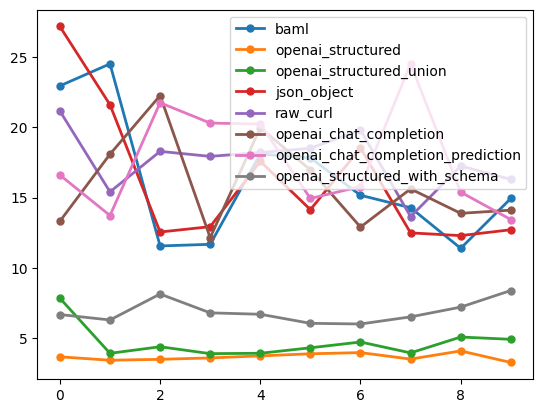

In [63]:
# Draw line plot of results
import matplotlib.pyplot as plt

# Plot each line in a different color
for i, (label, result) in enumerate(results.items()):
    plt.plot([r["time"] for r in result], label=label, marker='o', linestyle='-', linewidth=2, markersize=5)

plt.legend()
plt.show()


In [64]:
# pretty table
from prettytable import PrettyTable
import statistics

table = PrettyTable()
table.field_names = ["Label", "Mean (s)", "Std Dev (s)", "Min (s)", "Max (s)", "Total (s)"]
for label, r in results.items():
    result = [r["time"] for r in r]
    table.add_row([label, f"{statistics.mean(result):.4f}", f"{statistics.stdev(result):.4f}", f"{min(result):.4f}", f"{max(result):.4f}", f"{sum(result):.4f}"])
print(table)


+-----------------------------------+----------+-------------+---------+---------+-----------+
|               Label               | Mean (s) | Std Dev (s) | Min (s) | Max (s) | Total (s) |
+-----------------------------------+----------+-------------+---------+---------+-----------+
|                baml               | 16.2446  |    4.6194   | 11.4008 | 24.5126 |  162.4455 |
|         openai_structured         |  3.6807  |    0.2585   |  3.2846 |  4.1065 |  36.8075  |
|      openai_structured_union      |  4.7104  |    1.1880   |  3.9130 |  7.8535 |  47.1039  |
|            json_object            | 16.2044  |    5.0108   | 12.3032 | 27.1691 |  162.0444 |
|              raw_curl             | 17.6533  |    2.1472   | 13.6537 | 21.1613 |  176.5326 |
|       openai_chat_completion      | 15.9312  |    3.3310   | 12.1581 | 22.2598 |  159.3119 |
| openai_chat_completion_prediction | 17.6721  |    3.7676   | 13.4465 | 24.5233 |  176.7208 |
|   openai_structured_with_schema   |  6.8911  |  

/var/folders/j1/hfmhf1496vv29mng9yq7wmy80000gn/T/ipykernel_3871/1885449317.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(values, labels=keys)


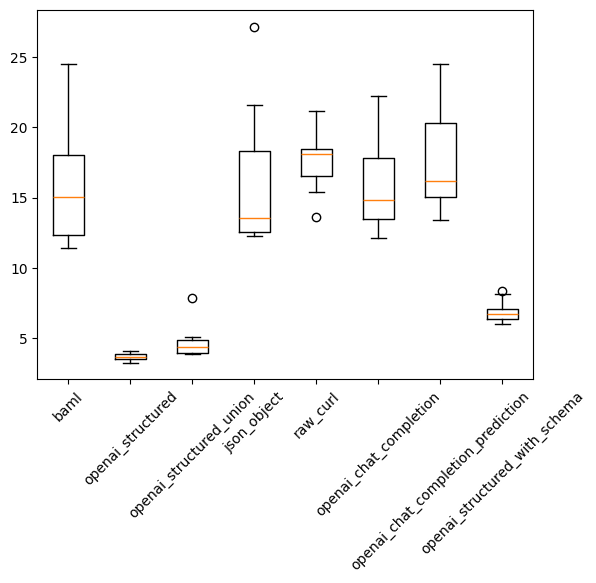

In [65]:
# Draw box plot of results with labels
keys = list(results.keys())
values = [[r["time"] for r in results[key]] for key in keys]
plt.boxplot(values, labels=keys)
plt.xticks(rotation=45)
plt.show()



In [66]:
for label, result in results.items():
    print(label, len(result))
    for r in result:
        print("-" * 10)
        if isinstance(r["value"], BaseModel):
            print(len(r["value"].model_dump_json()))
        elif isinstance(r["value"], str):
            print(len(r["value"]))
        elif r["value"] is None:
            print("None")
        else:
            print(len(r["value"]["choices"][0]["message"]["content"]))
    print()


baml 10
----------
1886
----------
1886
----------
1886
----------
1886
----------
1886
----------
1886
----------
1886
----------
1886
----------
1886
----------
1886

openai_structured 10
----------
1890
----------
1890
----------
1890
----------
1890
----------
1890
----------
1890
----------
1890
----------
1890
----------
1890
----------
1890

openai_structured_union 10
----------
1897
----------
1901
----------
1901
----------
1900
----------
1900
----------
1897
----------
1901
----------
1897
----------
1897
----------
1901

json_object 10
----------
3106
----------
3106
----------
3106
----------
3106
----------
3106
----------
3106
----------
3106
----------
3106
----------
3106
----------
3106

raw_curl 10
----------
3118
----------
3118
----------
3118
----------
3118
----------
3118
----------
3118
----------
3118
----------
3118
----------
3118
----------
3118

openai_chat_completion 10
----------
3118
----------
3118
----------
3118
----------
3118
----------
3118
------

In [67]:
print(results["openai_chat_completion"][0]["value"])


```json
{
  "items": [
    {
      "name": "Guide leash (1 Pair)",
      "description": null,
      "quantity": 1,
      "price": 34.95
    },
    {
      "name": "The Index Town Walls",
      "description": null,
      "quantity": 1,
      "price": 35.00
    },
    {
      "name": "Boot Punch",
      "description": null,
      "quantity": 3,
      "price": 60.00
    },
    {
      "name": "Burger Deluxe",
      "description": null,
      "quantity": 2,
      "price": 15.00
    },
    {
      "name": "Fries Large",
      "description": null,
      "quantity": 3,
      "price": 9.00
    },
    {
      "name": "Soda",
      "description": null,
      "quantity": 4,
      "price": 8.00
    },
    {
      "name": "Ice Cream Sundae",
      "description": null,
      "quantity": 2,
      "price": 10.00
    },
    {
      "name": "Coffee",
      "description": null,
      "quantity": 5,
      "price": 12.50
    },
    {
      "name": "Chicken Wings",
      "description": null,
      "quantity

In [52]:
print(results["baml"][0]["value"].model_dump_json())

{"items":[{"name":"Guide leash (1 Pair)","description":null,"quantity":1,"price":34.95},{"name":"The Index Town Walls","description":null,"quantity":1,"price":35.0},{"name":"Boot Punch","description":null,"quantity":3,"price":60.0},{"name":"Burger Deluxe","description":null,"quantity":2,"price":15.0},{"name":"Fries Large","description":null,"quantity":3,"price":9.0},{"name":"Soda","description":null,"quantity":4,"price":8.0},{"name":"Ice Cream Sundae","description":null,"quantity":2,"price":10.0},{"name":"Coffee","description":null,"quantity":5,"price":12.5},{"name":"Chicken Wings","description":null,"quantity":6,"price":18.0},{"name":"Salad","description":null,"quantity":2,"price":12.0},{"name":"Milkshake","description":null,"quantity":3,"price":7.5},{"name":"Onion Rings","description":null,"quantity":2,"price":6.0},{"name":"Nachos","description":null,"quantity":1,"price":8.5},{"name":"Pizza","description":null,"quantity":1,"price":14.0},{"name":"Pasta","description":null,"quantity":2